# Pymaceuticals Inc.
This jupyter notebook analysis the medications by the pahrmaceutical company after the treatments given to mices for 45 days on various different drugs.

### Analysis

- After Merging, Cleaning and Prepping the pharma data as needed. Below are some of the conclusions that can be drawn:
1. Among the 249 mices , Male mices were slightly more compared to Male mices. (Female - 49%, Male - 51%)
2. Based on box plot, Capomulin and Ramicane performed effectively when compared to Infubinol and Ceftamin
3. Infubinol had an outlier but other drugs were well within range.
4. Line plot on Capomulin on mouse i509 shows that the tumor continued to grow for almost 20 days and then started to decrease for next 15 days and then started to grow back again.
5. scatter plot on weight v/s average tumor volume showed a positive correlation, it shows that the larger the mice is , the bigger the tumor could be.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(data_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df[data_df.duplicated(["Mouse ID","Timepoint"])]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = duplicates["Mouse ID"].unique()[0]
duplicate_mouse_data = data_df.loc[data_df["Mouse ID"] == dup_mouse_id]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.set_index("Mouse ID")
clean_data_df = clean_data_df.drop(dup_mouse_id)
clean_data_df.reset_index(inplace=True)
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_data_reduced_df =  clean_data_df[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped = clean_data_reduced_df.groupby("Drug Regimen")

summary_stats = pd.DataFrame()
summary_stats["Mean Tumor Volume"] = pd.DataFrame(grouped["Tumor Volume (mm3)"].mean())
summary_stats["Median Tumor Volume"] = pd.DataFrame(grouped["Tumor Volume (mm3)"].median())
summary_stats["Tumor Volume Variance"] = pd.DataFrame(grouped["Tumor Volume (mm3)"].var())
summary_stats["Tumor Volume Std.Dev."] = pd.DataFrame(grouped["Tumor Volume (mm3)"].std())
summary_stats["Tumor Volume Std. Err."] = pd.DataFrame(grouped["Tumor Volume (mm3)"].sem())
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data_reduced_df =  clean_data_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen")
clean_data_agg_summary = clean_data_reduced_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
clean_data_agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

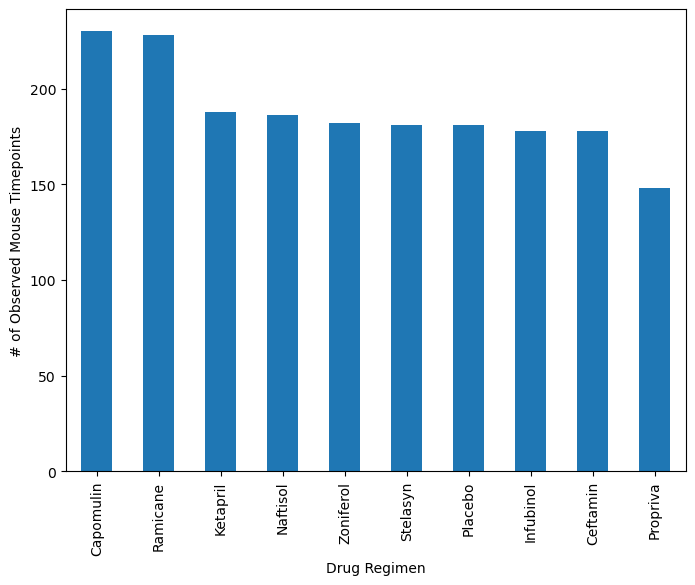

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = clean_data_df["Drug Regimen"].value_counts()


figure1 = drug_data.plot(kind="bar", figsize=(8,6),
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

plt.show()

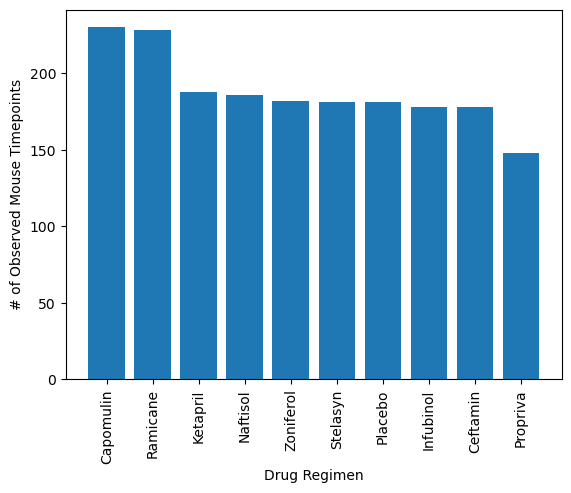

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# calculate unique drugs and its counts
drug_data = clean_data_df["Drug Regimen"].value_counts()
drug_data = drug_data.reset_index()

# get the length of x-axis , its tick locations and drug names
x_axis = np.arange(len(drug_data["Drug Regimen"]))
tick_locations = [value for value in x_axis]
x_values = drug_data["Drug Regimen"]

# get the values for y-axis
y_axis = drug_data["count"]

# plot bar graph
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, x_values, rotation="vertical")

# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# show the bar chart
plt.show()

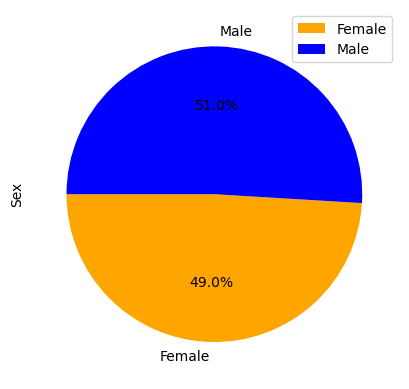

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_types = clean_data_df.groupby('Sex')

# Create a dataframe counting the number of data points for each type
mice_type_count = pd.DataFrame(mice_types['Sex'].count())

# View the groupby dataframe
mice_type_count.head()

fig1 = mice_type_count.plot(kind="pie", y="Sex", autopct="%1.1f%%", colors=["orange", "blue"], startangle=180)

plt.show()

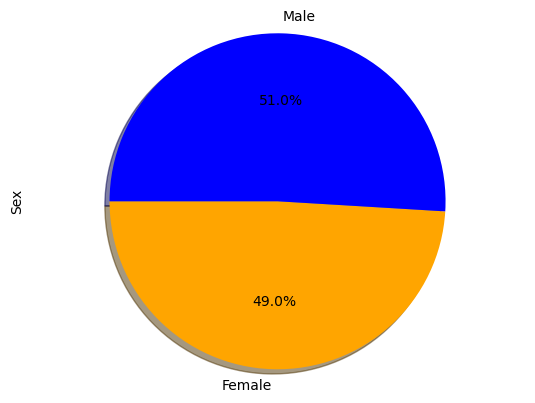

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a dataframe counting the number of data points for each type
mice_types = clean_data_df.groupby('Sex').count()
mice_types = mice_types.reset_index()
mice_types
# View the groupby dataframe
# mice_type_count.head()

plt.pie(mice_types["Mouse ID"], labels=mice_types["Sex"], colors=["orange", "blue"],
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_data_df.groupby(['Mouse ID'])["Timepoint"].max()
max_timepoint_df = max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_volume_df = max_timepoint_df.merge(clean_data_df, on=["Mouse ID", "Timepoint"], how="left")
last_tumor_volume_df = last_tumor_volume_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]].sort_values(by=["Drug Regimen", "Mouse ID"])
last_tumor_volume_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,b128,Capomulin,45,38.982878
24,b742,Capomulin,45,38.939633
61,f966,Capomulin,20,30.485985
64,g288,Capomulin,45,37.074024
66,g316,Capomulin,45,40.159220
...,...,...,...,...
159,q633,Zoniferol,45,70.827796
176,s337,Zoniferol,45,62.109651
207,w140,Zoniferol,5,47.717952
215,w575,Zoniferol,45,68.401286


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_value = last_tumor_volume_df.loc[last_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(tumor_value)

    # Determine outliers using upper and lower bounds

    quartiles = tumor_value.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_value.loc[(tumor_value < lower_bound) | (tumor_value > upper_bound)]
    print(f"{treatment}'s potential outliers {outliers}")


Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


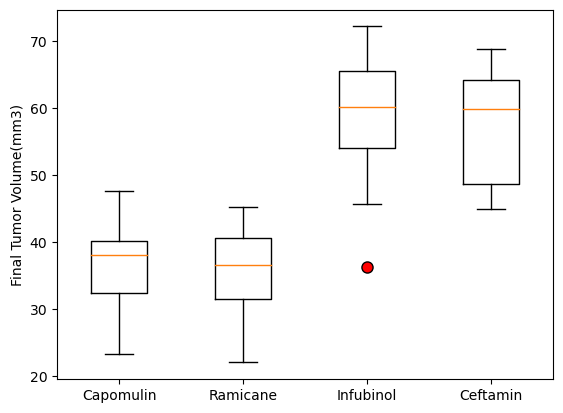

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outliers =dict(markerfacecolor='red', markersize=8)
plt.boxplot(tumor_data, labels = treatment_list, flierprops=outliers)
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

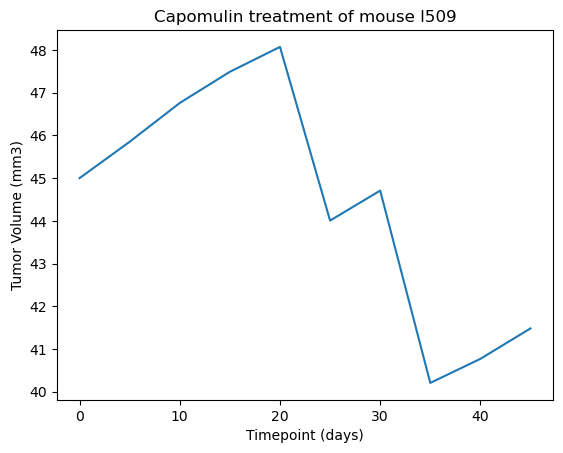

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

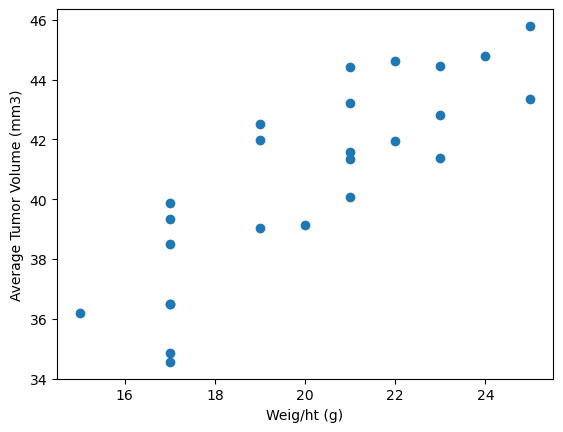

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean(numeric_only=True)
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weig/ht (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


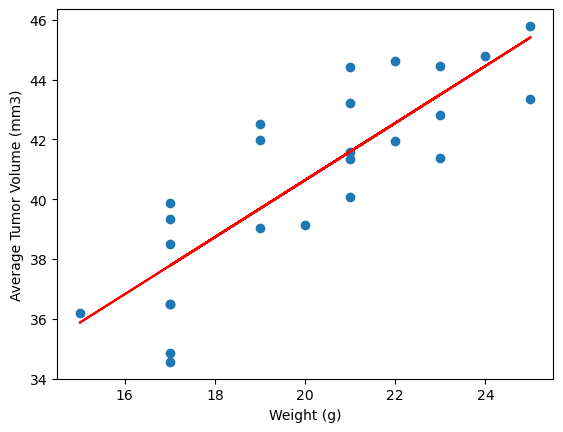

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
pe_fit = pe_slope * capomulin_avg["Weight (g)"] + pe_int
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], pe_fit, color ="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()